In [19]:
from api1_keys import api1_keys
print(api1_keys)

pk_e0125028f76745be8176a94b0e4b7682


In [20]:
from sandbox_key import sandbox_key
print(sandbox_key)

Tpk_6329721ba7a6463384e6f09c5027c093


In [21]:
from api_keys import api1_keys
from api_keys import sandbox_key
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from datetime import datetime
import math 
import statistics
from scipy import stats
from pprint import pprint #formats json

In [22]:
#if you want to start with unlimited free test data in our sandbox, you can set the API token for the client object.
import pyEX as p
c = p.Client(api_token=sandbox_key, version='sandbox')
#c = p.Client(api_token = stock_key, version = 'stable') when not having to use sandbox

In [23]:
#c = p.Client(api_token=stock_key, version='stable')
stock = ['XOM', 'DIS', 'DRI', 'LUV', 'HLT' ]

sym='XOM'
timeframe='2y'
XOM_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]


sym='HLT'
timeframe='2y'
HLT_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='DIS'
timeframe='2y'
DIS_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='DRI'
timeframe='2y'
DRI_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

sym='LUV'
timeframe='2y'
LUV_df = c.chartDF(symbol=sym, timeframe=timeframe)[['close', 'open', 'high', 'low', 'symbol']]

LUV_df
DIS_df
XOM_df

,close,open,high,low,symbol
date,,,,,
2021-04-27,58.38,58.28,59.4400,56.19,XOM
2021-04-26,58.04,58.17,56.6660,57.95,XOM
2021-04-23,55.68,55.78,57.6143,56.28,XOM
2021-04-22,57.98,56.80,58.0600,56.66,XOM
2021-04-21,56.00,56.70,57.1200,54.90,XOM
...,...,...,...,...,...
2019-05-03,79.99,80.41,79.5500,77.69,XOM
2019-05-02,79.53,79.16,78.6000,77.99,XOM
2019-05-01,79.95,80.69,82.7700,80.74,XOM


In [6]:
#concatenate dataframes
all_df = pd.concat([LUV_df, DRI_df, HLT_df, XOM_df, DIS_df], axis=0)
all_df = all_df.sort_index()
all_df

,close,open,high,low,symbol
date,,,,,
2019-04-29,145.70,146.51,148.11,142.42,DIS
2019-04-29,80.87,83.16,84.02,81.48,XOM
2019-04-29,55.93,53.43,55.99,53.78,LUV
2019-04-29,88.94,88.77,89.82,90.37,HLT
2019-04-29,122.45,122.95,124.82,125.26,DRI
...,...,...,...,...,...
2021-04-27,192.43,188.39,187.52,189.99,DIS
2021-04-27,144.76,147.17,148.00,148.00,DRI
2021-04-27,135.10,132.69,136.71,129.74,HLT


In [7]:
#show close, open, high, low stocks of industries of dates(difference of 3 months)
#pull  specific rows
XOM_days_df = XOM_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
DIS_days_df = DIS_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
HLT_days_df = HLT_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
LUV_days_df = LUV_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]
DRI_days_df = DRI_df.loc[['2020-01-02', '2020-03-16', '2021-03-16']]

LUV_days_df


,close,open,high,low,symbol
date,,,,,
2020-01-02,56.36,56.08,55.05,55.203,LUV
2020-03-16,38.04,37.60,40.01,36.750,LUV
2021-03-16,62.28,65.10,63.80,63.010,LUV


In [8]:
three_dates_df = pd.concat([DRI_days_df, LUV_days_df, HLT_days_df, XOM_days_df, DIS_days_df], axis=0)
three_dates_df = three_dates_df.sort_index()
three_dates_df

,close,open,high,low,symbol
date,,,,,
2020-01-02,115.82,114.40,113.40,109.5700,DRI
2020-01-02,56.36,56.08,55.05,55.2030,LUV
2020-01-02,112.24,111.17,114.84,114.8200,HLT
2020-01-02,71.80,73.51,74.06,71.5801,XOM
2020-01-02,155.40,146.45,154.20,151.7000,DIS
2020-03-16,49.23,58.94,60.71,47.3100,DRI
2020-03-16,38.04,37.60,40.01,36.7500,LUV
2020-03-16,72.11,71.15,79.62,66.2600,HLT
2020-03-16,35.36,35.40,39.65,33.9600,XOM


In [9]:
Jan_2020 = three_dates_df.iloc[0:5]
March_2020 = three_dates_df.iloc[5:10]
March_2021 = three_dates_df.iloc[10:15]
March_2021

,close,open,high,low,symbol
date,,,,,
2021-03-16,143.52,150.44,148.51,141.2047,DRI
2021-03-16,62.28,65.10,63.80,63.0100,LUV
2021-03-16,124.35,132.61,131.89,128.4700,HLT
2021-03-16,61.22,61.63,61.66,60.5100,XOM
2021-03-16,195.94,204.00,200.04,199.8300,DIS


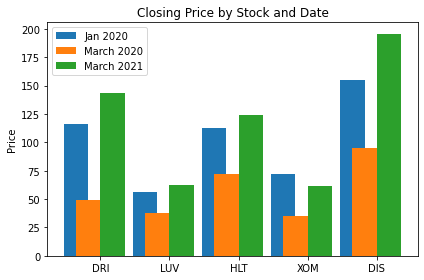

In [10]:
#graph for closing price by stock and date

labels = three_dates_df["symbol"].unique()

twentytwenty = Jan_2020['close']

march_twentytwenty = March_2020['close']
                
march_twentytwentyone = March_2021['close']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width, twentytwenty, width, label='Jan 2020')
rects2 = ax.bar( x - width/2, march_twentytwenty, width, label='March 2020')
rects3 = ax.bar(x + width/2, march_twentytwentyone, width, label = 'March 2021')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price')
ax.set_title('Closing Price by Stock and Date')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

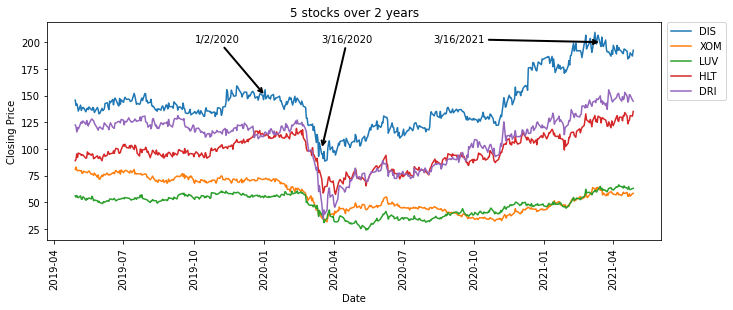

In [12]:
#PLANNING ON USING
fig_dims = (11, 4)

fig, ax = plt.subplots(figsize=fig_dims)
g = sns.lineplot(x="date", 
                 y="close", 
                 data=all_df,
                 hue="symbol")

# Add a title "Average MPG Over Time"
g.set_title('5 stocks over 2 years')
g.set(xlabel = 'Date', ylabel = 'Closing Price')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.xticks(rotation = 90)
ax.annotate("1/2/2020", xy = (pd.Timestamp('2020-01-02'), 150), xytext = (pd.Timestamp('2019-10-02'), 200), 
             arrowprops = {'arrowstyle': '->','linewidth': 2, 'color': 'black'})
ax.annotate("3/16/2020", xy = (pd.Timestamp('2020-03-16'), 100), xytext = (pd.Timestamp('2020-03-16'), 200),
            arrowprops = {'arrowstyle': '->','linewidth': 2, 'color': 'black'})
ax.annotate("3/16/2021", xy = (pd.Timestamp('2021-03-16'), 200), xytext = (pd.Timestamp('2020-08-09'), 200), 
            arrowprops = {'arrowstyle': '->', 'linewidth': 2, 'color': 'black'})

plt.show()

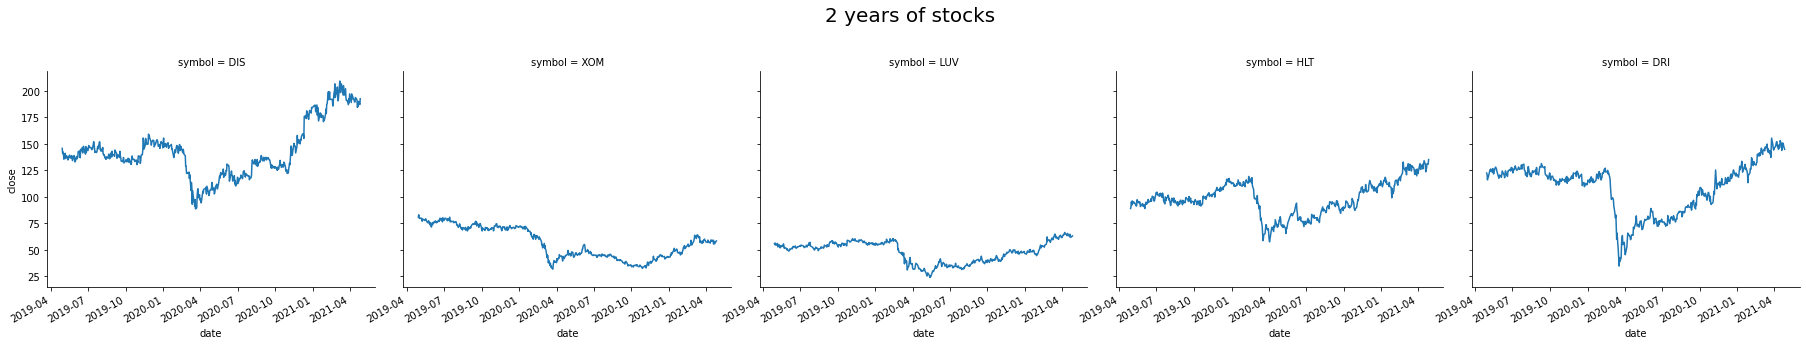

In [13]:
#PLANNING ON USING
g= sns.relplot(x = 'date', y = 'close', data = all_df, kind = "line", col = 'symbol')
g.fig.autofmt_xdate()
g.fig.suptitle('2 years of stocks', fontsize=20)
g.fig.subplots_adjust(top=.8);


In [18]:
def med (df):
    return df[['close', 'open', 'high', 'low']].median()
     



med_2yr_df = pd.DataFrame({'LUV_median': med(LUV_df), 
                           'HLT_median': med(HLT_df), 
                           'DIS_median': med(DIS_df), 
                           'XOM_median': med(XOM_df), 
                           'DRI_median': med(DRI_df)})

#mean_2yr_df = pd.DataFrame({'LUV_mean': round(mean(LUV_df), 
                            #'HLT_mean': round(mean(HLT_df),
                            #'DIS_mean': round(mean(DIS_df), 
                            #'XOM_mean': round(mean(XOM_df), 
                            #'DRI_mean': round(mean(DRI_df)})

display(med_2yr_df)
#display(mean_2yr_df)

,LUV_median,HLT_median,DIS_median,XOM_median,DRI_median
close,50.845,96.500,138.8750,55.4150,117.145
open,50.880,96.440,139.1650,55.9550,116.655
high,51.750,97.635,140.4395,56.9835,118.405
low,50.425,95.980,137.9150,55.0150,115.570


In [102]:
# calculating mean and median of all symbols from date 2019-04-23 to date 2019-12-31(covid starts to the year end)

all_df.head()


DIS_df = DIS_df.sort_index()
DIS_2019_df = DIS_df.loc["2019-04-23":"2019-12-31"]

XOM_df = XOM_df.sort_index()
XOM_2019_df = XOM_df.loc["2019-04-23":"2019-12-31"]

DRI_df= DRI_df.sort_index()
DRI_2019_df = DRI_df.loc["2019-04-23":"2019-12-31"]

HLT_df = HLT_df.sort_index()
HLT_2019_df = HLT_df.loc["2019-04-23":"2019-12-31"]

LUV_df = LUV_df.sort_index()
LUV_2019_df = LUV_df.loc["2019-04-23":"2019-12-31"]


Xmean = round(XOM_2019_df['close'].mean())
Dmean = round(DIS_2019_df['close'].mean())
DRmean = round(DRI_2019_df['close'].mean())
Hmean= round(HLT_2019_df['close'].mean())
Lmean = round(LUV_2019_df['close'].mean())

Xmedian = XOM_2019_df['close'].median()
Dmedian = DIS_2019_df['close'].median()
DRmedian = DRI_2019_df['close'].median()
Hmedian= HLT_2019_df['close'].median()
Lmedian= LUV_2019_df['close'].median()



mean_and_median_df = pd.DataFrame({'XOM mean 2019': [Xmean], 
                                   'XOM median 2019': [Xmedian], 
                                   'DIS mean 2019': [Dmean], 
                                   'DIS median 2019': [Dmedian],
                                   'HLT mean 2019' : [Hmean],
                                   'HLT median 2019' : [Hmedian]})

mean_and_median_df

,XOM mean 2019,XOM median 2019,DIS mean 2019,DIS median 2019,HLT mean 2019,HLT median 2019
0,74,72.985,142,140.795,99,97.285


In [69]:
# percentage changes from current opening to previous close of every after 3 days.
lo = LUV_df.loc[('2020-03-09'),('open')]
l9=LUV_df.loc[('2020-03-09'),('close')]
l12=LUV_df.loc[('2020-03-12'),('close')]
l16 =LUV_df.loc[('2020-03-16'),('close')]

xo = XOM_df.loc[('2020-03-09'),('open')]
x9 = XOM_df.loc[('2020-03-09'),('close')]
x12 = XOM_df.loc[('2020-03-12'),('close')]
x16 = XOM_df.loc[('2020-03-16'),('close')]

ho = HLT_df.loc[('2020-03-09'),('open')]
h9 = HLT_df.loc[('2020-03-09'),('close')]
h12 = HLT_df.loc[('2020-03-12'),('close')]
h16 = HLT_df.loc[('2020-03-16'),('close')]

do = DIS_df.loc[('2020-03-09'),('open')]
d9 =DIS_df.loc[('2020-03-09'),('close')]
d12 =DIS_df.loc[('2020-03-12'),('close')]
d16 =DIS_df.loc[('2020-03-16'),('close')]

dro = DRI_df.loc[('2020-03-09'),('open')]
dr9 =DRI_df.loc[('2020-03-09'),('close')]
dr12 = DRI_df.loc[('2020-03-12'),('close')]
dr16 = DRI_df.loc[('2020-03-16'),('close')]


LUV_drop_df = pd.DataFrame({'LUV 3/9/20 open': [lo], 'LUV 3/9/20': [l9], 'LUV 3/12/20': [l12], 'LUV 3/16/20': [l16]} )
XOM_drop_df = pd.DataFrame({'XOM 3/9/20 open': [xo], 'XOM 3/9/20': [x9], 'XOM 3/12/20': [x12], 'XOM 3/16/20': [x16]} )
HLT_drop_df = pd.DataFrame({'HLT 3/9/20 open': [ho], 'HLT 3/9/20': [h9], 'HLT 3/12/20': [h12], 'HLT 3/16/20': [h16]} )
DIS_drop_df = pd.DataFrame({'DIS 3/9/20 open': [do], 'DIS 3/9/20': [d9], 'DIS 3/12/20': [d12], 'DIS 3/16/20': [d16]} )
DRI_drop_df = pd.DataFrame({'DRI 3/9/20 open': [dro], 'DRI 3/9/20': [dr9], 'DRI 3/12/20': [dr12], 'DRI 3/16/20': [dr16]} )

LUV_pct = LUV_drop_df.pct_change(axis = 'columns')
HLT_pct = HLT_drop_df.pct_change(axis = 'columns')
DIS_pct = DIS_drop_df.pct_change(axis = 'columns')
XOM_pct = XOM_drop_df.pct_change(axis = 'columns')

print(LUV_pct)
print(HLT_pct)
print(DIS_pct)
print(XOM_pct)
print(DRI_pct)

display(XOM_pct)
display(XOM_drop_df)


   LUV 3/9/20 open  LUV 3/9/20  LUV 3/12/20  LUV 3/16/20
0              NaN     0.03431    -0.190246     0.044764
   HLT 3/9/20 open  HLT 3/9/20  HLT 3/12/20  HLT 3/16/20
0              NaN    0.050353    -0.113799    -0.118175
   DIS 3/9/20 open  DIS 3/9/20  DIS 3/12/20  DIS 3/16/20
0              NaN   -0.033509    -0.147349     0.074727
   XOM 3/9/20 open  XOM 3/9/20  XOM 3/12/20  XOM 3/16/20
0              NaN   -0.014365    -0.097085    -0.076022
   DRI 3/9/20 open  DRI 3/9/20  DRI 3/12/20  DRI 3/16/20
0              NaN   -0.039478    -0.256159    -0.138053


,XOM 3/9/20 open,XOM 3/9/20,XOM 3/12/20,XOM 3/16/20
0,NaN,-0.014365,-0.097085,-0.076022


,XOM 3/9/20 open,XOM 3/9/20,XOM 3/12/20,XOM 3/16/20
0,43.16,42.54,38.41,35.49


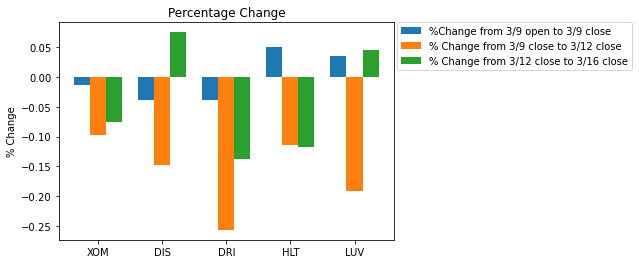

In [108]:
# calculate mean, median, percentage change of the companies from date 3/09/20 to date 3/16/20
labels = ['XOM', 'DIS', 'DRI', 'HLT', 'LUV']

means = [float(XOM_pct['XOM 3/9/20']), 
         float(DRI_pct['DRI 3/9/20']), 
         float(DRI_pct['DRI 3/9/20']),
         float(HLT_pct['HLT 3/9/20']),
         float(LUV_pct['LUV 3/9/20'])]

medians =  [float(XOM_pct['XOM 3/12/20']),
            float(DIS_pct['DIS 3/12/20']), 
            float(DRI_pct['DRI 3/12/20']),
            float(HLT_pct['HLT 3/12/20']), 
            float(LUV_pct['LUV 3/12/20'])]

current = [float(XOM_pct['XOM 3/16/20']),
           float(DIS_pct['DIS 3/16/20']),
           float(DRI_pct['DRI 3/16/20']),
           float(HLT_pct['HLT 3/16/20']),
           float(LUV_pct['LUV 3/16/20'])]


x = np.arange(5)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
#display the value of a bar
rects1 = ax.bar(x -.25, means, width, label='%Change from 3/9 open to 3/9 close')
rects2 = ax.bar(x, medians, width, label='% Change from 3/9 close to 3/12 close')
rects3 = ax.bar(x +.25, current, width, label="% Change from 3/12 close to 3/16 close")
ax.set_ylabel('% Change')
ax.set_title('Percentage Change')
ax.set_xticks(x) #xticks takes a list object as argument. It is a function in axes module of matplotlib library.
ax.set_xticklabels(labels)

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)


plt.show()


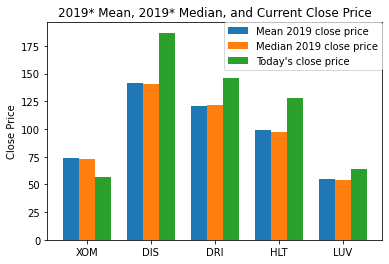

In [83]:
#bar chart 

#mean and median of 2019 vs current price

labels = ['XOM', 'DIS', 'DRI', 'HLT', 'LUV']
means = [Xmean, Dmean, DRmean, Hmean, Lmean]
medians = [ Xmedian, Dmedian, DRmedian, Hmedian, Lmedian]
current = [XOM_df.loc[('2021-04-23'),('close')], 
           DIS_df.loc[('2021-04-23'),('close')],
           DRI_df.loc[('2021-04-23'),('close')], 
           HLT_df.loc[('2021-04-23'),('close')],
           LUV_df.loc[('2021-04-23'),('close')]]

x = np.arange(5)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x -.25, means, width, label='Mean 2019 close price')
rects2 = ax.bar(x, medians, width, label='Median 2019 close price')
rects3 = ax.bar(x+ .25, current, width, label="Today's close price")
ax.set_ylabel('Close Price')
ax.set_title('2019* Mean, 2019* Median, and Current Close Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# the function bbox_to_anchor placed the legend in arbitary position.
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)

plt.show()


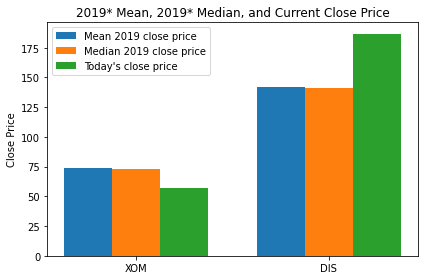

In [26]:
#bar graph for XOM  and DIS for close price of mean 2019 to current price, close price for median 2019 to current price.
labels = ['XOM', 'DIS']
means = [Xmean, Dmean]
medians = [ Xmedian, Dmedian]
current = XOM_df.loc[('2021-04-23'),('close')], DIS_df.loc[('2021-04-23'),('close')]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x -.25, means, width, label='Mean 2019 close price')
rects2 = ax.bar(x, medians, width, label='Median 2019 close price')
rects3 = ax.bar(x+ .25, current, width, label="Today's close price")
#fig, ax = plt.subplots()
#rects1 = ax.bar(x-width, men_means, width, label='Mean 2019 close price')
#rects2 = ax.bar(x - width/2, women_means, width, label='Median 2019 close price')
#rects2 = ax.bar(x + width/2, third, width, label="Today's close price")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Close Price')
ax.set_title('2019* Mean, 2019* Median, and Current Close Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

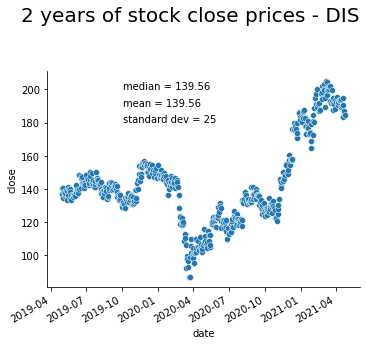

In [110]:
DIS_sd = round(statistics.stdev(DIS_df['close']))
DIS_df_mean = (round(DIS_df['close'].mean()))

DIS_df_median = DIS_df['close'].median()

g= sns.relplot(x = 'date', y = 'close', data = DIS_df, kind = "scatter")
g.fig.autofmt_xdate() #autofmt_xdate() - Date ticklabels often overlap, so it is useful to rotate them and right align them. 
g.fig.suptitle('2 years of stock close prices - DIS', fontsize=20)
g.fig.subplots_adjust(top= .8)
plt.text('2019-10-04', 200, "median = "  + str(DIS_df_median))
plt.text('2019-10-04', 190, "mean = " + str(DIS_df_median)) 
plt.text('2019-10-04', 180, "standard dev = " + str(DIS_sd))

plt.show()

In [31]:
to_LUV = np.corrcoef(DIS_df['close'], LUV_df['close'])
to_XOM = np.corrcoef(DIS_df['close'], XOM_df['close'])
to_DRI =np.corrcoef(DIS_df['close'], DRI_df['close'])
to_HLT = np.corrcoef(DIS_df['close'], HLT_df['close'])
LUV_cov = round(to_LUV[0,1],4)
XOM_cov = round(to_XOM[0,1],4)
DRI_cov = round(to_DRI[0,1],4)
HLT_cov = round(to_HLT[0,1],4)

print( 'The correlation between DIS and LUV is ' + str(LUV_cov))
print( 'The correlation between DIS and XOM is ' + str(XOM_cov))
print( 'The correlation between DIS and DRI is ' + str(DRI_cov))
print( 'The correlation between DIS and HLT is ' + str(HLT_cov))

The correlation between DIS and LUV is 0.682
The correlation between DIS and XOM is 0.2252
The correlation between DIS and DRI is 0.8365
The correlation between DIS and HLT is 0.9051
